In [ ]:
# ✅ Install dependencies
!pip install tensorflow scikit-learn opencv-python pillow

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/39.5 MB 4.6 MB/s eta 0:00:09
    --------------------------------------- 0.7/39.5 MB 7.5 MB/s eta 0:00:06
   - -------------------------------------- 1.3/39.5 MB 9.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/39.5 MB 11.1 MB/s eta 0:00:04
   --- ------------------------------------ 3.0/39.5 MB 12.9 MB/s eta 0:00:03
   ---- ----------------------------------- 4.3/39.5 MB 15.1 MB/s eta 0:00:03
   ----- ---------------------------------- 5.8/39.5 MB 17.7 MB/s eta 0:00:02
   ------- -------------------------------- 7.8/39.5 MB 20.9 MB/s eta 0:00:02
   ---------- ----------------------------- 10.2/39.5 MB 24.2 MB/s eta 0:00:02
   ------------- -------------------------- 13.4/39.5 MB 43.7 MB/s eta 0:00:01
   ----------------- ---------------------- 17.4/39.5 MB 65.6 MB/s eta 0:00:01
   --------------------- ------------------ 21.4/39.5 MB 81.8 MB/s eta 0

In [ ]:
!pip uninstall numpy pandas tensorflow keras -y
@pip install numpy==2.0.2
pip install --no-binary :all: pandas tensorflow keras

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.1.4
Uninstalling pandas-2.1.4:
  Successfully uninstalled pandas-2.1.4
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2
  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl (15.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.0.1 requires pandas>=0.18, which is not installed.
bokeh 3.3.4 requires pandas>=1.2, which is not installed.
datashader 0.16.0 requires pandas, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
holoviews 1.18.3 requires pandas>=0.20.0, which is not installed.
hvplot 0.9.2 requires pandas, which is not installed.
panel 1.3.8 requires pandas>=1.2, which is not installed.
seaborn 0.12.2 requires pandas>=0.25, which is not installed.
statsmodels 0.14.0 requires pandas>=1.0, which is not installed.
streamlit 1.30.0 requires pandas<3,>=1.3.0, which is not installed.
tensorflow-intel 2.18.0 requires keras>=3.5.0, which is not installed.
xarray 2023.6.0 requires pandas>=1.4, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.2 which is incompa

     ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.4 MB 435.7 kB/s eta 0:00:11
     - -------------------------------------- 0.2/4.4 MB 1.5 MB/s eta 0:00:03
     ---- ----------------------------------- 0.5/4.4 MB 2.8 MB/s eta 0:00:02
     ------- -------------------------------- 0.9/4.4 MB 3.9 MB/s eta 0:00:01
     ------------ --------------------------- 1.4/4.4 MB 5.0 MB/s eta 0:00:01
     ----------------- ---------------------- 1.9/4.4 MB 6.2 MB/s eta 0:00:01
     ------------------------ --------------- 2.7/4.4 MB 7.4 MB/s eta 0:00:01
     --------------------------------- ------ 3.7/4.4 MB 9.0 MB/s eta 0:00:01
     ---------------------------------------  4.4/4.4 MB 10.0 MB/s eta 0:00:01
     ---------------------------------------  4.4/4.4 MB 10.0 MB/s eta 0:00:01
     ---------------------------------------- 4.4/4.4 MB 8.8 MB/s eta 0:00

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [132 lines of output]
       ---------------------------------------- 0.0/68.5 kB ? eta -:--:--
       ----- ---------------------------------- 10.2/68.5 kB ? eta -:--:--
       ---------------------- --------------- 41.0/68.5 kB 393.8 kB/s eta 0:00:01
       ---------------------------------- --- 61.4/68.5 kB 544.7 kB/s eta 0:00:01
       -------------------------------------- 68.5/68.5 kB 413.3 kB/s eta 0:00:00
    Installing build dependencies: started
    Installing build dependencies: still running...
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Installing backend dependencies: started
    Installing backend dependencies: still running...
    Installing backend dependencies: still running...
    Installing backe

In [ ]:
conda install tensorflow -c conda-forge

error: incomplete escape \U at position 28

In [ ]:
# ✅ Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Reshape, Flatten, Conv2DTranspose, Conv2D,
    LeakyReLU, Dropout, Input, concatenate
)
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tqdm.notebook import tqdm  # progress bar
import pathlib

# ✅ Load and preprocess images
def load_images_from_csv(csv_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)
    image_paths = df["File name"].values
    images = []

    for path in image_paths:
        full_path = os.path.join(os.path.dirname(csv_path), path) if not os.path.isabs(path) else path
        if os.path.exists(full_path):
            img = cv2.imread(full_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size) / 127.5 - 1  # Normalize to [-1,1]
            images.append(img)
        else:
            print(f"Warning: File not found - {full_path}")

    return np.array(images)

# ✅ Load and encode labels
def encode_labels(csv_path):
    df = pd.read_csv(csv_path)
    labels = df["Label"].astype(str).values
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    encoded_labels = to_categorical(numeric_labels, num_classes)
    return encoded_labels, num_classes, label_encoder

# ✅ Define Generator Model
def build_generator(latent_dim=100, num_classes=10):
    noise_input = Input(shape=(latent_dim,))
    label_input = Input(shape=(num_classes,))
    merged = concatenate([noise_input, label_input])
    x = Dense(128 * 32 * 32, activation="relu")(merged)
    x = Reshape((32, 32, 128))(x)
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)
    img_output = Conv2DTranspose(3, (4, 4), activation='tanh', padding='same')(x)
    return Model([noise_input, label_input], img_output)

# ✅ Define Discriminator Model
def build_discriminator(img_shape=(128, 128, 3), num_classes=10):
    img_input = Input(shape=img_shape)
    x = Conv2D(64, (4, 4), strides=(2, 2), padding='same')(img_input)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    class_output = Dense(num_classes, activation='softmax')(x)
    return Model(img_input, class_output)

# ✅ Load dataset
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
real_images = load_images_from_csv(csv_path)
encoded_labels, num_classes, label_encoder = encode_labels(csv_path)

# ✅ Initialize models
latent_dim = 100
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(num_classes=num_classes)

# ✅ Compile Discriminator
discriminator.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Compile GAN
discriminator.trainable = False
gan_input_noise = Input(shape=(latent_dim,))
gan_input_label = Input(shape=(num_classes,))
gen_output = generator([gan_input_noise, gan_input_label])
gan_output = discriminator(gen_output)
gan = Model([gan_input_noise, gan_input_label], gan_output)
gan.compile(optimizer='adam', loss='categorical_crossentropy')
discriminator.trainable = True

# ✅ GAN Training
def train_gan(epochs=800, batch_size=128):
    half_batch = batch_size // 2
    for epoch in tqdm(range(epochs), desc="Training Epochs"):
        # Train Discriminator
        idx = np.random.randint(0, real_images.shape[0], half_batch)
        real_imgs = real_images[idx]
        real_labels = encoded_labels[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        sampled_labels = to_categorical(np.random.randint(0, num_classes, half_batch), num_classes)
        fake_imgs = generator.predict([noise, sampled_labels], verbose=0)

        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, sampled_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        sampled_labels = to_categorical(np.random.randint(0, num_classes, batch_size), num_classes)
        g_loss = gan.train_on_batch([noise, sampled_labels], np.ones((batch_size, num_classes)))

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: [D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

# ✅ Run training
train_gan(epochs=800, batch_size=128)

# ✅ Save models
output_dir = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese"
generator.save(os.path.join(output_dir, "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/food_generator.hdf5"))
discriminator.save(os.path.join(output_dir, "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/food_discriminator.hdf5"))

# ✅ Optional: For Google Colab only
# from google.colab import files
# files.download(os.path.join(output_dir, "food_generator.hdf5"))
# files.download(os.path.join(output_dir, "food_discriminator.hdf5"))

Training Epochs:   0%|          | 0/800 [00:00<?, ?it/s]

Epoch 0: [D loss: 4.7719, acc: 1.56%] [G loss: 557.5463]
Epoch 100: [D loss: 3.2441, acc: 43.75%] [G loss: 619.2485]
Epoch 200: [D loss: 2.5000, acc: 46.88%] [G loss: 570.0812]
Epoch 300: [D loss: 2.4975, acc: 46.09%] [G loss: 561.5189]
Epoch 400: [D loss: 2.4948, acc: 46.88%] [G loss: 561.5281]
Epoch 500: [D loss: 2.4927, acc: 45.31%] [G loss: 559.8954]
Epoch 600: [D loss: 2.4973, acc: 45.31%] [G loss: 561.6252]
Epoch 700: [D loss: 2.5057, acc: 45.31%] [G loss: 562.5105]


C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# ✅ Load trained generator
generator = tf.keras.models.load_model("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/food_generator.hdf5")

def generate_images(num_images, save_path="C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/generated_images"):
    os.makedirs(save_path, exist_ok=True)

    latent_dim = 100
    label_dim = 17  # match your training

    noise = np.random.randn(num_images, latent_dim).astype(np.float32)
    labels = np.random.randint(0, label_dim, size=(num_images,))
    labels_onehot = to_categorical(labels, num_classes=label_dim).astype(np.float32)

    # ✅ Concatenate noise and label
    combined_input = np.concatenate([noise, labels_onehot], axis=1)

    # ✅ Predict
    fake_images = generator.predict(combined_input, verbose=0)

    for i in range(num_images):
        img = ((fake_images[i] + 1) * 127.5).astype(np.uint8)

        if img.shape[-1] == 1:
            img = img.squeeze(-1)

        # ✅ Save directly as RGB
        cv2.imwrite(os.path.join(save_path, f"fake_{i}.png"), img)

# ✅ Generate images
generate_images(1000)


ValueError: in user code:

    File "C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 117) dtype=float32>]


In [ ]:
# ✅ Import necessary libraries
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Reshape, Flatten, Conv2DTranspose, Conv2D,
    LeakyReLU, Dropout, Input
)
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm

# ✅ Load and preprocess images
def load_images_from_csv(csv_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)
    image_paths = df["File name"].values
    images = []
    for path in image_paths:
        full_path = os.path.join(os.path.dirname(csv_path), path) if not os.path.isabs(path) else path
        if os.path.exists(full_path):
            img = cv2.imread(full_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size) / 127.5 - 1  # Normalize to [-1,1]
            images.append(img)
        else:
            print(f"Warning: File not found - {full_path}")
    return np.array(images)

# ✅ Load and encode labels
def encode_labels(csv_path):
    df = pd.read_csv(csv_path)
    labels = df["Label"].astype(str).values
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    encoded_labels = to_categorical(numeric_labels, num_classes)
    return encoded_labels, num_classes, label_encoder

# ✅ Build Generator (one input: noise + label)
def build_generator(latent_dim=100, num_classes=10):
    combined_input = Input(shape=(latent_dim + num_classes,))  # (110 if 10 classes)
    x = Dense(128 * 32 * 32, activation="relu")(combined_input)
    x = Reshape((32, 32, 128))(x)
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)
    img_output = Conv2DTranspose(3, (4, 4), activation='tanh', padding='same')(x)
    return Model(combined_input, img_output)

# ✅ Build Discriminator
def build_discriminator(img_shape=(128, 128, 3), num_classes=10):
    img_input = Input(shape=img_shape)
    x = Conv2D(64, (4, 4), strides=(2, 2), padding='same')(img_input)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    class_output = Dense(num_classes, activation='softmax')(x)
    return Model(img_input, class_output)

# ✅ Load dataset
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
real_images = load_images_from_csv(csv_path)
encoded_labels, num_classes, label_encoder = encode_labels(csv_path)

# ✅ Initialize models
latent_dim = 100
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(num_classes=num_classes)

# ✅ Compile Discriminator
discriminator.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Compile GAN (combined model)
discriminator.trainable = False
gan_input = Input(shape=(latent_dim + num_classes,))  # combined noise + label
gen_output = generator(gan_input)
gan_output = discriminator(gen_output)
gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='categorical_crossentropy')
discriminator.trainable = True

# ✅ GAN Training Function
def train_gan(epochs=800, batch_size=128):
    half_batch = batch_size // 2
    for epoch in tqdm(range(epochs), desc="Training Epochs"):
        # Train Discriminator
        idx = np.random.randint(0, real_images.shape[0], half_batch)
        real_imgs = real_images[idx]
        real_labels = encoded_labels[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        sampled_labels = np.random.randint(0, num_classes, half_batch)
        sampled_labels_onehot = to_categorical(sampled_labels, num_classes)
        combined_input_fake = np.concatenate([noise, sampled_labels_onehot], axis=1)
        fake_imgs = generator.predict(combined_input_fake, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, sampled_labels_onehot)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        sampled_labels = np.random.randint(0, num_classes, batch_size)
        sampled_labels_onehot = to_categorical(sampled_labels, num_classes)
        combined_input_gan = np.concatenate([noise, sampled_labels_onehot], axis=1)

        g_loss = gan.train_on_batch(combined_input_gan, np.ones((batch_size, num_classes)))

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: [D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

# ✅ Run training
train_gan(epochs=800, batch_size=128)

# ✅ Save trained models
output_dir = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese"
generator.save(os.path.join(output_dir, "food_generator2.hdf5"))
discriminator.save(os.path.join(output_dir, "food_discriminator2.hdf5"))

print("✅ Training completed and models saved!")


Training Epochs:   0%|          | 0/800 [00:00<?, ?it/s]

Epoch 0: [D loss: 4.7781, acc: 1.56%] [G loss: 557.1941]
Epoch 100: [D loss: 2.6293, acc: 48.44%] [G loss: 570.9572]
Epoch 200: [D loss: 2.7335, acc: 43.75%] [G loss: 607.2224]
Epoch 300: [D loss: 18.7333, acc: 44.53%] [G loss: 4727.9238]
Epoch 400: [D loss: 14.5934, acc: 40.62%] [G loss: 2529.7781]
Epoch 500: [D loss: 2.6821, acc: 48.44%] [G loss: 595.0170]
Epoch 600: [D loss: 2.6921, acc: 45.31%] [G loss: 580.2623]
Epoch 700: [D loss: 2.6622, acc: 46.09%] [G loss: 595.3820]


C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Training completed and models saved!


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# ✅ Load trained generator
generator = tf.keras.models.load_model("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/food_generator.hdf5")

def generate_fake_images(num_images, save_path="C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/generated_images"):
    os.makedirs(save_path, exist_ok=True)

    latent_dim = 100
    label_dim = 117  # ⚡ Your model expects 17 classes

    # ✅ Generate noise
    noise = np.random.randn(num_images, latent_dim).astype(np.float32)

    # ✅ Generate random labels
    labels = np.random.randint(0, label_dim, size=(num_images,))
    labels_onehot = to_categorical(labels, num_classes=label_dim).astype(np.float32)

    # ✅ Pass [noise, labels] separately into the generator
    fake_images = generator.predict([noise, labels_onehot], verbose=0)

    for i in range(num_images):
        img = ((fake_images[i] + 1) * 127.5).astype(np.uint8)

        if img.shape[-1] == 1:
            img = img.squeeze(-1)

        # ✅ Save directly without RGB to BGR conversion
        cv2.imwrite(os.path.join(save_path, f"fake_{i}.png"), img)

    print(f"✅ Successfully generated and saved {num_images} images to {save_path}")

# ✅ Run it
generate_fake_images(1000)






✅ Successfully generated and saved 1000 images to C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/generated_images


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Define Paths
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
real_images_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese"   # Real images location
fake_images_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/generated_images"  # Fake images location

# ✅ Load real images from CSV
def load_real_images_from_csv(csv_path, folder_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)
    if "File name" not in df.columns:
        raise ValueError("CSV must contain a 'File name' column.")

    filenames = df["File name"].values
    images = []
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size) / 255.0  # Normalize to [0,1]
                images.append(img)
            else:
                print(f"⚠️ Warning: Failed to load {img_path}")
        else:
            print(f"⚠️ Warning: File not found {img_path}")
    return np.array(images)

# ✅ Load fake images from folder
def load_images_from_folder(folder_path, img_size=(128, 128)):
    images = []
    if not os.path.exists(folder_path):
        print(f"❌ Folder {folder_path} does not exist!")
        return np.array([])
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size) / 255.0
            images.append(img)
    return np.array(images)

# ✅ Load datasets
real_images = load_real_images_from_csv(csv_path, real_images_folder)
fake_images = load_images_from_folder(fake_images_folder)

print(f"✅ Loaded {real_images.shape[0]} real images.")
print(f"✅ Loaded {fake_images.shape[0]} fake images.")

# ✅ Create labels
real_labels = np.ones(len(real_images))  # Label 1 for real
fake_labels = np.zeros(len(fake_images)) # Label 0 for fake

# ✅ Combine datasets
X = np.concatenate([real_images, fake_images], axis=0)
y = np.concatenate([real_labels, fake_labels], axis=0)

print(f"✅ Combined dataset shape: {X.shape}, Labels shape: {y.shape}")

# ✅ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Build a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Real (1) or Fake (0)
])

# ✅ Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train the CNN
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Evaluate the CNN
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")
model.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_real_vs_fake.hdf5")
print("✅ Model saved successfully!")

✅ Loaded 370 real images.
✅ Loaded 1000 fake images.
✅ Combined dataset shape: (1370, 128, 128, 3), Labels shape: (1370,)
Epoch 1/20
28/28 [==============================] - 12s 314ms/step - loss: 0.1173 - accuracy: 0.9418 - val_loss: 3.9243e-12 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 8s 301ms/step - loss: 6.7139e-07 - accuracy: 1.0000 - val_loss: 6.4743e-15 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 8s 297ms/step - loss: 9.7270e-09 - accuracy: 1.0000 - val_loss: 5.6716e-15 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 8s 282ms/step - loss: 1.8983e-08 - accuracy: 1.0000 - val_loss: 4.7175e-15 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 8s 305ms/step - loss: 9.8754e-09 - accuracy: 1.0000 - val_loss: 2.9900e-15 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 9s 334ms/step - loss: 8.2454e-08 - accuracy: 1.0000 - val_loss: 1.5890e-15 - va

C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model saved successfully!


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# ✅ Settings
fake_images_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/generated_images"
num_classes = 17  # You generated with 17 class labels
img_size = (128, 128)

# ✅ Load fake images
def load_fake_images(folder_path, img_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png") and "fake_" in filename:
            # Example filename: fake_123.png, where 123 is class (optional)
            # Let's say you encoded class label in the image filename (fake_{label}_{index}.png)
            parts = filename.replace(".png", "").split("_")
            if len(parts) == 3:
                class_id = int(parts[1])  # e.g., fake_5_43.png => class = 5
            else:
                class_id = np.random.randint(0, num_classes)  # fallback if not embedded

            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size) / 255.0
                images.append(img)
                labels.append(class_id)
    return np.array(images), np.array(labels)

X, y = load_fake_images(fake_images_folder, img_size)

print(f"✅ Loaded {X.shape[0]} fake images with {num_classes} class labels.")

# ✅ Convert labels to categorical (for softmax output)
y_cat = to_categorical(y, num_classes=num_classes)

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, shuffle=True)

# ✅ Build CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Multiclass classification
])

# ✅ Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy on Fake Image Classes: {accuracy*100:.2f}%")

# ✅ Save model
model.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_fake_image_classifier.h5")
print("✅ Model saved as cnn_fake_image_classifier.h5")


✅ Loaded 1000 fake images with 17 class labels.
Epoch 1/20
20/20 [==============================] - 14s 338ms/step - loss: 2.9846 - accuracy: 0.0562 - val_loss: 2.8332 - val_accuracy: 0.0500
Epoch 2/20
20/20 [==============================] - 6s 297ms/step - loss: 2.8374 - accuracy: 0.0531 - val_loss: 2.8310 - val_accuracy: 0.0625
Epoch 3/20
20/20 [==============================] - 6s 304ms/step - loss: 2.8332 - accuracy: 0.0594 - val_loss: 2.8255 - val_accuracy: 0.0625
Epoch 4/20
20/20 [==============================] - 6s 311ms/step - loss: 2.8286 - accuracy: 0.0719 - val_loss: 2.8255 - val_accuracy: 0.0625
Epoch 5/20
20/20 [==============================] - 6s 303ms/step - loss: 2.8376 - accuracy: 0.0750 - val_loss: 2.8266 - val_accuracy: 0.0625
Epoch 6/20
20/20 [==============================] - 6s 303ms/step - loss: 2.8337 - accuracy: 0.0781 - val_loss: 2.8257 - val_accuracy: 0.0500
Epoch 7/20
20/20 [==============================] - 6s 299ms/step - loss: 2.8263 - accuracy: 0.0734

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Paths
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
real_images_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese"
img_size = (128, 128)

# ✅ Load real images and labels from CSV
def load_real_images_with_labels(csv_path, folder_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)

    if "File name" not in df.columns or "Label" not in df.columns:
        raise ValueError("CSV must contain 'File name' and 'Label' columns.")

    images = []
    labels = []

    for _, row in df.iterrows():
        filename = row["File name"]
        label = row["Label"]
        img_path = os.path.join(folder_path, filename)

        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size) / 255.0
                images.append(img)
                labels.append(label)
            else:
                print(f"⚠️ Could not read: {img_path}")
        else:
            print(f"⚠️ File not found: {img_path}")

    return np.array(images), np.array(labels)

# ✅ Load data
X, labels = load_real_images_with_labels(csv_path, real_images_folder, img_size)
print(f"✅ Loaded {X.shape[0]} real images.")

# ✅ Encode string labels to integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
y_cat = to_categorical(y, num_classes=num_classes)

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, shuffle=True)

# ✅ Build CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Multiclass classification
])

# ✅ Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy on Real Images: {accuracy*100:.2f}%")

# ✅ Save model
model.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_real_image_classifier.h5")
print("✅ Model saved as cnn_real_image_classifier.h5")


✅ Loaded 370 real images.
Epoch 1/20
8/8 [==============================] - 4s 393ms/step - loss: 4.7753 - accuracy: 0.0127 - val_loss: 4.7436 - val_accuracy: 0.0333
Epoch 2/20
8/8 [==============================] - 2s 288ms/step - loss: 4.6101 - accuracy: 0.0381 - val_loss: 4.7582 - val_accuracy: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 2s 284ms/step - loss: 4.5319 - accuracy: 0.0339 - val_loss: 4.8270 - val_accuracy: 0.0167
Epoch 4/20
8/8 [==============================] - 2s 285ms/step - loss: 4.4683 - accuracy: 0.0466 - val_loss: 4.7447 - val_accuracy: 0.0167
Epoch 5/20
8/8 [==============================] - 2s 285ms/step - loss: 4.2162 - accuracy: 0.1102 - val_loss: 4.9006 - val_accuracy: 0.0333
Epoch 6/20
8/8 [==============================] - 2s 294ms/step - loss: 4.0057 - accuracy: 0.1229 - val_loss: 4.6140 - val_accuracy: 0.0333
Epoch 7/20
8/8 [==============================] - 2s 291ms/step - loss: 3.6347 - accuracy: 0.1907 - val_loss: 4.9944 - val_accurac

C:\Users\Grace Ataguba\anaconda3\envs\tfgan\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model saved as cnn_real_image_classifier.h5


✅ Model loaded successfully.
1/1 [==============================] - 8s 8s/step


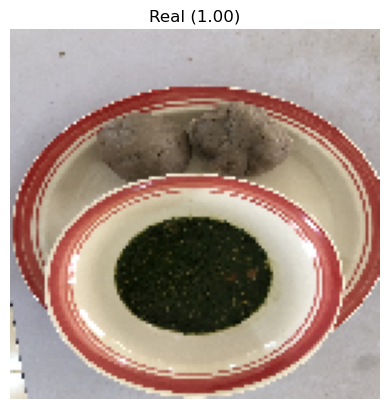

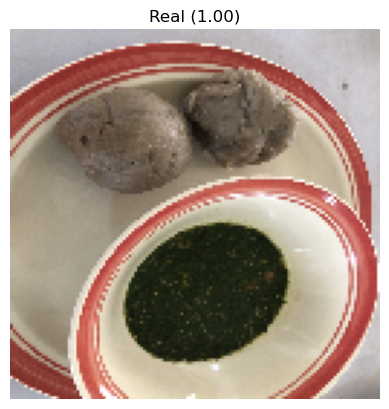

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# ✅ Load the saved model
model_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_real_vs_fake.hdf5"
model = load_model(model_path)
print("✅ Model loaded successfully.")

# ✅ Function to load and preprocess a single image
def preprocess_image(img_path, img_size=(128, 128)):
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"❌ Image not found: {img_path}")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0
    return img

# ✅ Predict function for a list of image paths
def predict_images(image_paths, img_size=(128, 128)):
    images = [preprocess_image(p, img_size) for p in image_paths]
    images = np.array(images)
    predictions = model.predict(images)
    return predictions

# ✅ Visualize predictions
def display_predictions(image_paths, predictions, threshold=0.5):
    for i, img_path in enumerate(image_paths):
        label = "Real" if predictions[i] > threshold else "Fake"
        confidence = predictions[i][0]
        img = preprocess_image(img_path)
        plt.imshow(img)
        plt.title(f"{label} ({confidence:.2f})")
        plt.axis('off')
        plt.show()

# ✅ Example usage with sample images
sample_images = [
    "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese/Amala/IMG_0625.jpeg",
     "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese/Amala/IMG_0626.jpeg",
]

# ✅ Run predictions
predictions = predict_images(sample_images)

# ✅ Display results
display_predictions(sample_images, predictions)


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Define paths
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
images_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese"
img_size = (128, 128)

# ✅ Load images and labels
def load_images_and_labels(csv_path, folder_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)

    if not {"File name", "Label"}.issubset(df.columns):
        raise ValueError("CSV must contain 'File name' and 'Label' columns.")

    images = []
    labels = []

    for _, row in df.iterrows():
        img_path = os.path.join(folder_path, row["File name"])
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size) / 255.0
                images.append(img)
                labels.append(row["Label"].strip())  # ✅ Trim whitespace
            else:
                print(f"⚠️ Failed to load {img_path}")
        else:
            print(f"⚠️ File not found: {img_path}")

    return np.array(images), np.array(labels)

# ✅ Load dataset
X, y_raw = load_images_and_labels(csv_path, images_folder, img_size)

# ✅ Encode labels to integers then to one-hot vectors
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y_raw)
num_classes = len(label_encoder.classes_)  # ✅ Automatically determine number of unique classes
y = to_categorical(y_int, num_classes=num_classes)

print(f"✅ Loaded {X.shape[0]} images with {num_classes} unique classes.")

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Build CNN model for multi-class classification
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # ✅ Output matches dynamic class count
])

# ✅ Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")

# ✅ Save model and label encoder
model.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_food_multiclass.hdf5")
np.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/label_classes.npy", label_encoder.classes_)
print("✅ Model and label classes saved successfully.")


✅ Loaded 370 images with 117 unique classes.
Epoch 1/20
8/8 [==============================] - 20s 2s/step - loss: 4.9401 - accuracy: 0.0169 - val_loss: 4.7487 - val_accuracy: 0.0500
Epoch 2/20
8/8 [==============================] - 3s 320ms/step - loss: 4.6592 - accuracy: 0.0169 - val_loss: 4.7791 - val_accuracy: 0.0333
Epoch 3/20
8/8 [==============================] - 3s 315ms/step - loss: 4.5739 - accuracy: 0.0339 - val_loss: 4.7839 - val_accuracy: 0.0333
Epoch 4/20
8/8 [==============================] - 3s 376ms/step - loss: 4.4983 - accuracy: 0.0339 - val_loss: 4.7271 - val_accuracy: 0.0167
Epoch 5/20
8/8 [==============================] - 3s 398ms/step - loss: 4.4140 - accuracy: 0.0508 - val_loss: 4.7205 - val_accuracy: 0.0000e+00
Epoch 6/20
8/8 [==============================] - 3s 351ms/step - loss: 4.1822 - accuracy: 0.0890 - val_loss: 4.7189 - val_accuracy: 0.0167
Epoch 7/20
8/8 [==============================] - 3s 341ms/step - loss: 3.8445 - accuracy: 0.1483 - val_loss: 5.1

C:\Users\Grace Ataguba\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model and label classes saved successfully.


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Define paths
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
images_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese"
img_size = (128, 128)

# ✅ Load images and labels
def load_images_and_labels(csv_path, folder_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)

    if not {"File name", "Label"}.issubset(df.columns):
        raise ValueError("CSV must contain 'File name' and 'Label' columns.")

    images = []
    labels = []

    for _, row in df.iterrows():
        img_path = os.path.join(folder_path, row["File name"])
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size) / 255.0
                images.append(img)
                labels.append(row["Label"].strip())  # ✅ Trim whitespace
            else:
                print(f"⚠️ Failed to load {img_path}")
        else:
            print(f"⚠️ File not found: {img_path}")

    return np.array(images), np.array(labels)

# ✅ Load dataset
X, y_raw = load_images_and_labels(csv_path, images_folder, img_size)

# ✅ Encode labels to integers then to one-hot vectors
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y_raw)
num_classes = len(label_encoder.classes_)  # ✅ Automatically determine number of unique classes
y = to_categorical(y_int, num_classes=num_classes)

print(f"✅ Loaded {X.shape[0]} images with {num_classes} unique classes.")

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Build CNN model for multi-class classification
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # ✅ Output matches dynamic class count
])

# ✅ Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")

# ✅ Save model and label encoder
model.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_food_multiclass.hdf5")
np.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/label_classes.npy", label_encoder.classes_)
print("✅ Model and label classes saved successfully.")


✅ Loaded 370 images with 117 unique classes.
Epoch 1/20
8/8 [==============================] - 20s 2s/step - loss: 4.9401 - accuracy: 0.0169 - val_loss: 4.7487 - val_accuracy: 0.0500
Epoch 2/20
8/8 [==============================] - 3s 320ms/step - loss: 4.6592 - accuracy: 0.0169 - val_loss: 4.7791 - val_accuracy: 0.0333
Epoch 3/20
8/8 [==============================] - 3s 315ms/step - loss: 4.5739 - accuracy: 0.0339 - val_loss: 4.7839 - val_accuracy: 0.0333
Epoch 4/20
8/8 [==============================] - 3s 376ms/step - loss: 4.4983 - accuracy: 0.0339 - val_loss: 4.7271 - val_accuracy: 0.0167
Epoch 5/20
8/8 [==============================] - 3s 398ms/step - loss: 4.4140 - accuracy: 0.0508 - val_loss: 4.7205 - val_accuracy: 0.0000e+00
Epoch 6/20
8/8 [==============================] - 3s 351ms/step - loss: 4.1822 - accuracy: 0.0890 - val_loss: 4.7189 - val_accuracy: 0.0167
Epoch 7/20
8/8 [==============================] - 3s 341ms/step - loss: 3.8445 - accuracy: 0.1483 - val_loss: 5.1

C:\Users\Grace Ataguba\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model and label classes saved successfully.


In [ ]:
#Trained a CNN model with only the original images and obtained 27% accuracy

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Define paths
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
images_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese"
img_size = (128, 128)

# ✅ Load images and labels
def load_images_and_labels(csv_path, folder_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)

    if not {"File name", "Label"}.issubset(df.columns):
        raise ValueError("CSV must contain 'File name' and 'Label' columns.")

    images = []
    labels = []

    for _, row in df.iterrows():
        img_path = os.path.join(folder_path, row["File name"])
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size) / 255.0
                images.append(img)
                labels.append(row["Label"].strip())  # ✅ Trim whitespace
            else:
                print(f"⚠️ Failed to load {img_path}")
        else:
            print(f"⚠️ File not found: {img_path}")

    return np.array(images), np.array(labels)

# ✅ Load dataset
X, y_raw = load_images_and_labels(csv_path, images_folder, img_size)

# ✅ Encode labels to integers then to one-hot vectors
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y_raw)
num_classes = len(label_encoder.classes_)  # ✅ Automatically determine number of unique classes
y = to_categorical(y_int, num_classes=num_classes)

print(f"✅ Loaded {X.shape[0]} images with {num_classes} unique classes.")

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Build CNN model for multi-class classification
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # ✅ Output matches dynamic class count
])

# ✅ Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")

# ✅ Save model and label encoder
model.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_food_multiclass.hdf5")
np.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/label_classes.npy", label_encoder.classes_)
print("✅ Model and label classes saved successfully.")


✅ Loaded 370 images with 117 unique classes.
Epoch 1/20
8/8 [==============================] - 20s 2s/step - loss: 4.9401 - accuracy: 0.0169 - val_loss: 4.7487 - val_accuracy: 0.0500
Epoch 2/20
8/8 [==============================] - 3s 320ms/step - loss: 4.6592 - accuracy: 0.0169 - val_loss: 4.7791 - val_accuracy: 0.0333
Epoch 3/20
8/8 [==============================] - 3s 315ms/step - loss: 4.5739 - accuracy: 0.0339 - val_loss: 4.7839 - val_accuracy: 0.0333
Epoch 4/20
8/8 [==============================] - 3s 376ms/step - loss: 4.4983 - accuracy: 0.0339 - val_loss: 4.7271 - val_accuracy: 0.0167
Epoch 5/20
8/8 [==============================] - 3s 398ms/step - loss: 4.4140 - accuracy: 0.0508 - val_loss: 4.7205 - val_accuracy: 0.0000e+00
Epoch 6/20
8/8 [==============================] - 3s 351ms/step - loss: 4.1822 - accuracy: 0.0890 - val_loss: 4.7189 - val_accuracy: 0.0167
Epoch 7/20
8/8 [==============================] - 3s 341ms/step - loss: 3.8445 - accuracy: 0.1483 - val_loss: 5.1

C:\Users\Grace Ataguba\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model and label classes saved successfully.


In [ ]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 1.4 MB/s eta 0:00:09
    --------------------------------------- 0.3/11.6 MB 4.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.6 MB 7.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.6 MB 8.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.6 MB 10.6 MB/s eta 0:00:01
   ---------- ----------------------------- 3.2/11.6 MB 12.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.6 MB 15.1 MB/s eta 0:00:01
   --------------------- ------------------ 6.2/11.6 MB 18.2 MB/s eta 0:00:01
   ---------------------------- ----------- 8.3/11.6 MB 21.3 MB/s eta 0:00:01
   ------------------------------------- -- 11.0/11.6 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 34.4 MB/s eta 0:0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.
streamlit 1.30.0 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.


In [ ]:
# ✅ Import Libraries (unchanged)
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2DTranspose, Conv2D, LeakyReLU, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm

# ✅ Load and preprocess images
def load_images_from_csv(csv_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)
    image_paths = df["File name"].values
    images = []
    for path in image_paths:
        full_path = os.path.join(os.path.dirname(csv_path), path) if not os.path.isabs(path) else path
        if os.path.exists(full_path):
            img = cv2.imread(full_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size) / 127.5 - 1  # Normalize to [-1, 1]
            images.append(img)
        else:
            print(f"⚠️ File not found: {full_path}")
    return np.array(images)

# ✅ Encode labels
def encode_labels(csv_path):
    df = pd.read_csv(csv_path)
    labels = df["Label"].astype(str).str.strip().values  # ✅ Clean labels
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    encoded_labels = to_categorical(numeric_labels, num_classes)
    return encoded_labels, num_classes, label_encoder

# ✅ Build Generator
def build_generator(latent_dim=100, num_classes=64):
    combined_input = Input(shape=(latent_dim + num_classes,))
    x = Dense(128 * 32 * 32, activation="relu")(combined_input)
    x = Reshape((32, 32, 128))(x)
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)  # 64x64
    x = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)   # 128x128
    img_output = Conv2DTranspose(3, (3, 3), activation='tanh', padding='same')(x)
    return Model(combined_input, img_output)

# ✅ Build Discriminator
def build_discriminator(img_shape=(128, 128, 3), num_classes=64):
    img_input = Input(shape=img_shape)
    x = Conv2D(64, (4, 4), strides=(2, 2), padding='same')(img_input)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    class_output = Dense(num_classes, activation='softmax')(x)
    return Model(img_input, class_output)

# ✅ Load dataset
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
real_images = load_images_from_csv(csv_path)
encoded_labels, num_classes, label_encoder = encode_labels(csv_path)

# ✅ Initialize models
latent_dim = 100
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(num_classes=num_classes)

# ✅ Compile Discriminator
discriminator.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Compile GAN
discriminator.trainable = False
gan_input = Input(shape=(latent_dim + num_classes,))
gen_output = generator(gan_input)
gan_output = discriminator(gen_output)
gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='categorical_crossentropy')
discriminator.trainable = True

# ✅ Training loop
def train_gan(epochs=800, batch_size=64):
    half_batch = batch_size // 2
    for epoch in tqdm(range(epochs), desc="Training Epochs"):
        # Discriminator
        idx = np.random.randint(0, real_images.shape[0], half_batch)
        real_imgs = real_images[idx]
        real_labels = encoded_labels[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        sampled_labels = np.random.randint(0, num_classes, half_batch)
        sampled_labels_onehot = to_categorical(sampled_labels, num_classes)
        fake_input = np.concatenate([noise, sampled_labels_onehot], axis=1)
        fake_imgs = generator.predict(fake_input, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, sampled_labels_onehot)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        sampled_labels = np.random.randint(0, num_classes, batch_size)
        sampled_labels_onehot = to_categorical(sampled_labels, num_classes)
        combined_input = np.concatenate([noise, sampled_labels_onehot], axis=1)
        g_loss = gan.train_on_batch(combined_input, np.ones((batch_size, num_classes)))

        # Log progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: [D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

# ✅ Run training
train_gan(epochs=800, batch_size=64)

# ✅ Save models
output_dir = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese"
generator.save(os.path.join(output_dir, "food_generator_64class.hdf5"))
discriminator.save(os.path.join(output_dir, "food_discriminator_64class.hdf5"))

print("✅ GAN training complete and models saved!")

Training Epochs:   0%|          | 0/800 [00:00<?, ?it/s]

Epoch 0: [D loss: 4.7680, acc: 1.56%] [G loss: 557.2888]
Epoch 100: [D loss: 2.6934, acc: 48.44%] [G loss: 596.0761]
Epoch 200: [D loss: 2.8552, acc: 45.31%] [G loss: 604.0549]
Epoch 300: [D loss: 3.0524, acc: 46.88%] [G loss: 623.4778]
Epoch 400: [D loss: 2.9212, acc: 42.19%] [G loss: 591.2577]
Epoch 500: [D loss: 2.8781, acc: 39.06%] [G loss: 600.6536]
Epoch 600: [D loss: 2.6463, acc: 42.19%] [G loss: 574.9009]
Epoch 700: [D loss: 2.6762, acc: 46.88%] [G loss: 595.4092]


C:\Users\Grace Ataguba\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ GAN training complete and models saved!


In [ ]:
#Trained a GAN model based on 116 classes of foods in our dataset: Add all the accuracy values and divide them by 11 to get the average accuracy of your GAN model

In [ ]:
# ✅ GAN Training Code for 116-Class Food Generator (After Merging to 116 Classes)

import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2DTranspose, Conv2D, LeakyReLU, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# ✅ Load and preprocess images
def load_images_from_csv(csv_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)
    image_paths = df["File name"].values
    images = []
    for path in image_paths:
        full_path = os.path.join(os.path.dirname(csv_path), path) if not os.path.isabs(path) else path
        if os.path.exists(full_path):
            img = cv2.imread(full_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size) / 127.5 - 1
            images.append(img)
    return np.array(images)

# ✅ Encode labels to 64 merged classes
def encode_labels(csv_path):  # updated to reflect 116 classes
    df = pd.read_csv(csv_path)
    labels = df["Label"].astype(str).str.strip().str.lower().values
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(labels)
    num_classes = 116
    encoded_labels = to_categorical(numeric_labels, num_classes=num_classes)
    return encoded_labels, num_classes, label_encoder

# ✅ Build Generator
def build_generator(latent_dim=100, num_classes=116):
    input_layer = Input(shape=(latent_dim + num_classes,))
    x = Dense(128 * 32 * 32, activation='relu')(input_layer)
    x = Reshape((32, 32, 128))(x)
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', activation='relu')(x)
    output_img = Conv2DTranspose(3, (3, 3), activation='tanh', padding='same')(x)
    return Model(input_layer, output_img)

# ✅ Build Discriminator
def build_discriminator(img_shape=(128, 128, 3), num_classes=116):
    input_img = Input(shape=img_shape)
    x = Conv2D(64, (4, 4), strides=(2, 2), padding='same')(input_img)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    output_class = Dense(116, activation='softmax')(x)
    return Model(input_img, output_class)

# ✅ Train GAN
def train_gan(generator, discriminator, real_images, encoded_labels, latent_dim=100, epochs=500, batch_size=64):
    num_classes = encoded_labels.shape[1]
    half_batch = batch_size // 2

    discriminator.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim + num_classes,))
    generated_img = generator(gan_input)
    gan_output = discriminator(generated_img)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='categorical_crossentropy')
    discriminator.trainable = True

    for epoch in tqdm(range(epochs)):
        idx = np.random.randint(0, real_images.shape[0], half_batch)
        real_imgs = real_images[idx]
        real_lbls = encoded_labels[idx]

        noise = np.random.randn(half_batch, latent_dim).astype(np.float32)
        random_classes = np.random.randint(0, num_classes, half_batch)
        random_lbls = to_categorical(random_classes, num_classes=num_classes)
        gen_input = np.concatenate([noise, random_lbls], axis=1)
        fake_imgs = generator.predict(gen_input, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_imgs, real_lbls)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, random_lbls)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.randn(batch_size, latent_dim).astype(np.float32)
        sampled_classes = np.random.randint(0, num_classes, batch_size)
        sampled_labels = to_categorical(sampled_classes, num_classes=num_classes)
        gen_input = np.concatenate([noise, sampled_labels], axis=1)
        g_loss = gan.train_on_batch(gen_input, sampled_labels)

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: D Loss = {d_loss[0]:.4f}, Acc = {d_loss[1]*100:.2f}%, G Loss = {g_loss:.4f}")

    return generator, discriminator

# ✅ Run training
csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
real_images = load_images_from_csv(csv_path)
encoded_labels, num_classes, label_encoder = encode_labels(csv_path)

generator = build_generator(latent_dim=100, num_classes=116)
discriminator = build_discriminator(num_classes=116)

generator, discriminator = train_gan(generator, discriminator, real_images, encoded_labels, latent_dim=100)

generator.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/food_generator_64class.hdf5")
discriminator.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/food_discriminator_64class.hdf5")
np.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/label_classes_64.npy", label_encoder.classes_)
print("✅ Training complete and models saved.")





  0%|▏                                                                                 | 1/500 [00:06<51:28,  6.19s/it]

Epoch 0: D Loss = 4.7486, Acc = 0.00%, G Loss = 4.7535


 10%|████████▎                                                                        | 51/500 [03:05<26:07,  3.49s/it]

Epoch 50: D Loss = 2.8465, Acc = 43.75%, G Loss = 4.5067


 20%|████████████████▏                                                               | 101/500 [06:03<23:45,  3.57s/it]

Epoch 100: D Loss = 0.1361, Acc = 95.31%, G Loss = 0.3311


 30%|████████████████████████▏                                                       | 151/500 [08:57<20:00,  3.44s/it]

Epoch 150: D Loss = 0.2102, Acc = 92.19%, G Loss = 0.1572


 40%|████████████████████████████████▏                                               | 201/500 [11:51<17:30,  3.51s/it]

Epoch 200: D Loss = 0.2163, Acc = 92.19%, G Loss = 0.0279


 50%|████████████████████████████████████████▏                                       | 251/500 [15:10<19:43,  4.75s/it]

Epoch 250: D Loss = 0.2666, Acc = 95.31%, G Loss = 0.0015


 60%|████████████████████████████████████████████████▏                               | 301/500 [18:33<12:15,  3.70s/it]

Epoch 300: D Loss = 0.1826, Acc = 96.88%, G Loss = 0.0886


 70%|████████████████████████████████████████████████████████▏                       | 351/500 [22:18<11:37,  4.68s/it]

Epoch 350: D Loss = 0.4057, Acc = 93.75%, G Loss = 0.0565


 80%|████████████████████████████████████████████████████████████████▏               | 401/500 [26:07<07:03,  4.28s/it]

Epoch 400: D Loss = 0.0933, Acc = 96.88%, G Loss = 0.0717


 90%|████████████████████████████████████████████████████████████████████████▏       | 451/500 [29:53<03:55,  4.81s/it]

Epoch 450: D Loss = 0.3944, Acc = 95.31%, G Loss = 0.0023


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [33:39<00:00,  4.04s/it]
C:\Users\Grace Ataguba\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Training complete and models saved.


In [ ]:
#Used the GAN model to augment the datasets and we obtained 2320 additional datasets

In [ ]:
# ✅ Generator Script for Fake Images

def generate_fake_images(generator_path, num_classes=116, output_dir="generated_images", latent_dim=100, n_per_class=20):
    import os
    import numpy as np
    import cv2
    import tensorflow as tf
    from tensorflow.keras.utils import to_categorical

    generator = tf.keras.models.load_model(generator_path)
    os.makedirs(output_dir, exist_ok=True)

    for class_id in range(num_classes):
        labels = to_categorical([class_id] * n_per_class, num_classes=num_classes)
        noise = np.random.randn(n_per_class, latent_dim)
        gen_input = np.concatenate([noise, labels], axis=1)
        fake_imgs = generator.predict(gen_input, verbose=0)

        class_folder = os.path.join(output_dir, f"class_{class_id}")
        os.makedirs(class_folder, exist_ok=True)

        for i, img in enumerate(fake_imgs):
            img = ((img + 1) * 127.5).astype(np.uint8)
            if img.shape[-1] == 1:
                img = img.squeeze(-1)
            cv2.imwrite(os.path.join(class_folder, f"fake_{i}.png"), img)

    print(f"✅ Generated {n_per_class * num_classes} fake images in {output_dir}")

# Usage:
generate_fake_images("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/food_generator_64class.hdf5", 116, "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/saved_generator_ope)

✅ Generated 2320 fake images in C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/saved_generator_ope.hdf5


In [ ]:
#Trained the CNN model with the combined datasets: original and augmented datasets. We obtained a training accuracy of xxxx, validation accuracy of xxxxx, and a test accuracy of 90.33%

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Parameters
img_size = (128, 128)
real_csv_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/deepobesecsv2.csv"
real_img_folder = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese"
fake_img_folder_root = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/saved_generator_ope.hdf5"

# ✅ Step 1: Extract and map 116 unique class labels
def build_label_map(csv_path):
    df = pd.read_csv(csv_path)
    labels = df['Label'].astype(str).str.strip().str.lower().unique()
    label_list = sorted(labels)
    label_to_index = {label: idx for idx, label in enumerate(label_list)}
    return label_to_index

# ✅ Step 2: Load real images using label map
def load_real_images(csv_path, folder_path, label_to_index):
    df = pd.read_csv(csv_path)
    images, labels = [], []
    for _, row in df.iterrows():
        img_path = os.path.join(folder_path, row['File name'])
        label = str(row['Label']).strip().lower()
        if os.path.exists(img_path) and label in label_to_index:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size) / 255.0
            images.append(img)
            labels.append(label_to_index[label])  # use class index
    return np.array(images), np.array(labels)

# ✅ Step 3: Load fake images assuming folder names are class_0, class_1, ..., class_115
def load_fake_images(folder_root):
    images, labels = [], []
    for class_id in range(116):
        class_folder = os.path.join(folder_root, f"class_{class_id}")
        if os.path.exists(class_folder):
            for file in os.listdir(class_folder):
                img_path = os.path.join(class_folder, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size) / 255.0
                    images.append(img)
                    labels.append(class_id)
    return np.array(images), np.array(labels)

# ✅ Build label map and load data
label_to_index = build_label_map(real_csv_path)
real_images, real_labels = load_real_images(real_csv_path, real_img_folder, label_to_index)
fake_images, fake_labels = load_fake_images(fake_img_folder_root)

# ✅ Combine datasets
X = np.concatenate([real_images, fake_images])
y_int = np.concatenate([real_labels, fake_labels])
y = to_categorical(y_int, num_classes=116)

print(f"✅ Combined dataset: {X.shape[0]} images, {y.shape[1]} classes")

# ✅ Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(116, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {acc * 100:.2f}%")

# ✅ Save model and class map
model.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_combined_116class.h5")
np.save("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/label_map_116.npy", list(label_to_index.keys()))
print("✅ Model and label mapping saved.")


✅ Combined dataset: 2690 images, 116 classes
Epoch 1/20
54/54 [==============================] - 45s 420ms/step - loss: 4.7666 - accuracy: 0.0116 - val_loss: 4.7353 - val_accuracy: 0.0232
Epoch 2/20
54/54 [==============================] - 19s 358ms/step - loss: 4.3913 - accuracy: 0.0761 - val_loss: 3.5101 - val_accuracy: 0.2390
Epoch 3/20
54/54 [==============================] - 19s 353ms/step - loss: 2.9636 - accuracy: 0.3016 - val_loss: 1.9257 - val_accuracy: 0.5870
Epoch 4/20
54/54 [==============================] - 22s 402ms/step - loss: 1.8596 - accuracy: 0.5259 - val_loss: 1.0554 - val_accuracy: 0.7680
Epoch 5/20
54/54 [==============================] - 23s 421ms/step - loss: 1.2514 - accuracy: 0.6665 - val_loss: 0.6864 - val_accuracy: 0.8260
Epoch 6/20
54/54 [==============================] - 23s 423ms/step - loss: 0.9648 - accuracy: 0.7362 - val_loss: 0.5919 - val_accuracy: 0.8492
Epoch 7/20
54/54 [==============================] - 23s 427ms/step - loss: 0.7823 - accuracy: 0.7

C:\Users\Grace Ataguba\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model and label mapping saved.


17/17 [==============================] - 2s 95ms/step


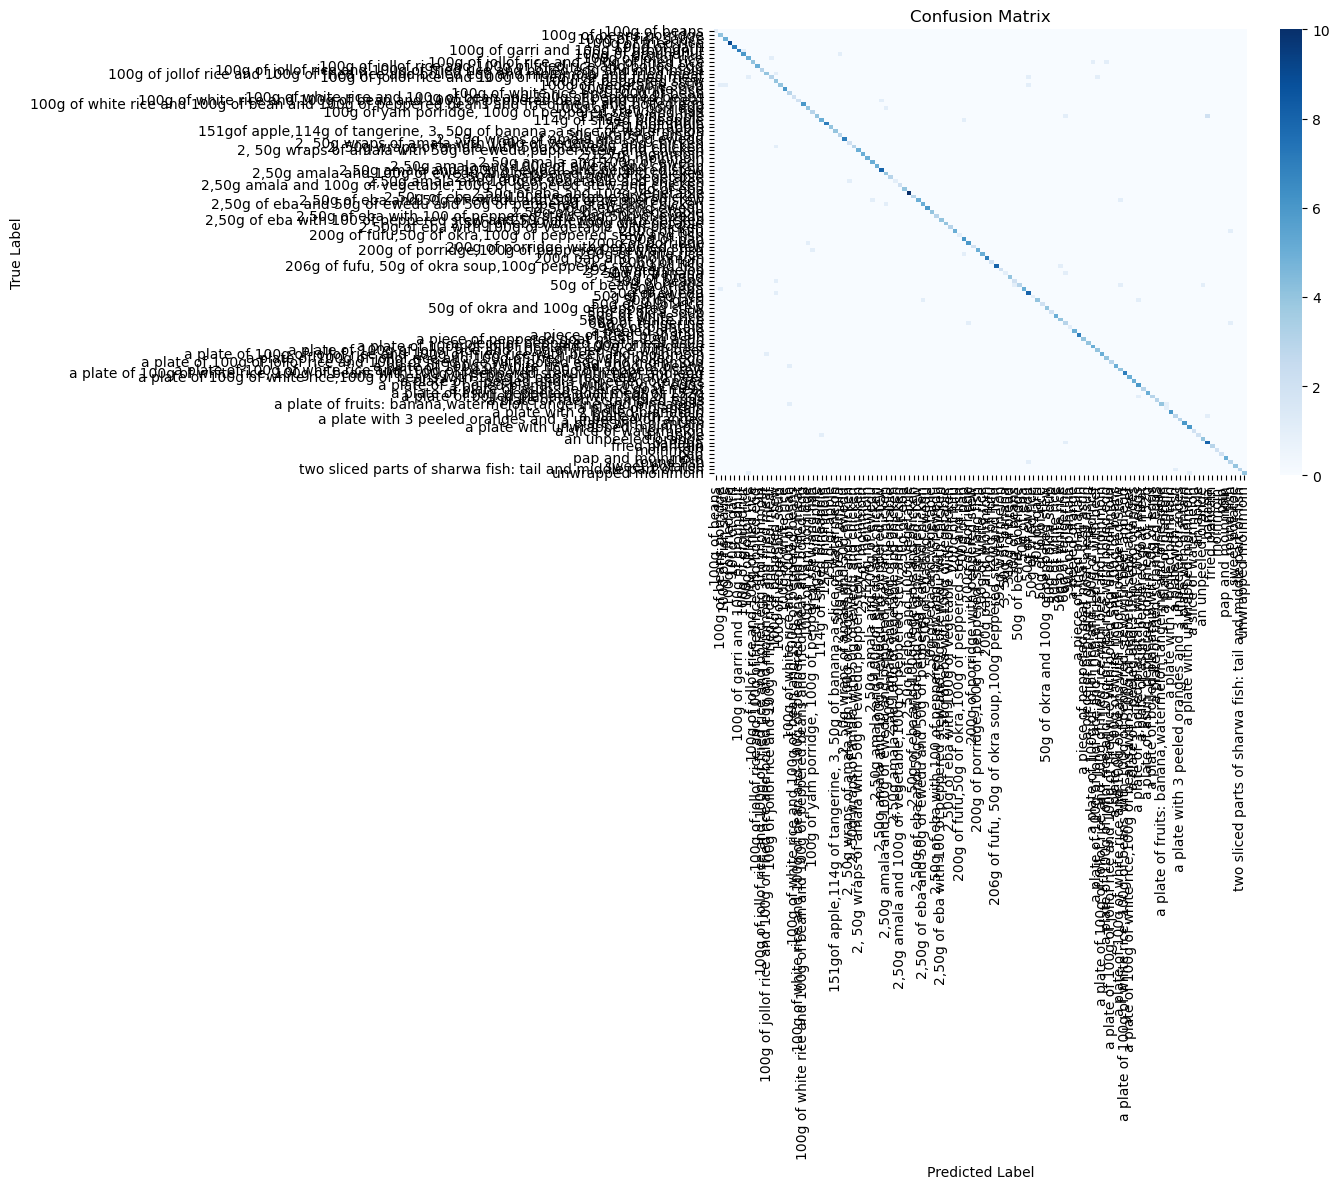

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Get predicted class indices
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Load label names for axis ticks
label_names = np.load("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/label_map_116.npy", allow_pickle=True)

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(cm, xticklabels=label_names, yticklabels=label_names, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Confusion matrix showing the performance of our model in the real world

In [ ]:
print(classification_report(y_true, y_pred, target_names=label_names))

                                                                                              precision    recall  f1-score   support

                                                                               100g of beans       1.00      1.00      1.00         1
                                                                      100g of beans porridge       0.67      1.00      0.80         4
                                                                          100g of fish sauce       0.83      1.00      0.91         5
                                                                          100g of fried rice       1.00      1.00      1.00         9
                                                                               100g of garri       1.00      1.00      1.00         7
                                                         100g of garri and 100g of groundnut       0.88      0.88      0.88         8
                                                             

In [ ]:
#Visualize how the model performed on test images

✅ Model loaded successfully.
1/1 [==============================] - 0s 130ms/step


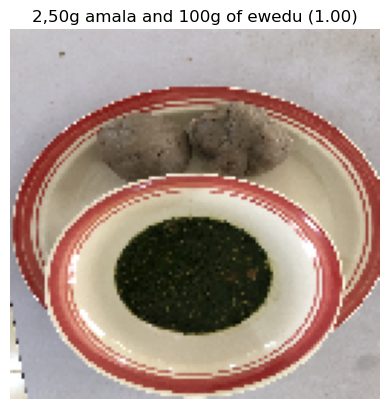

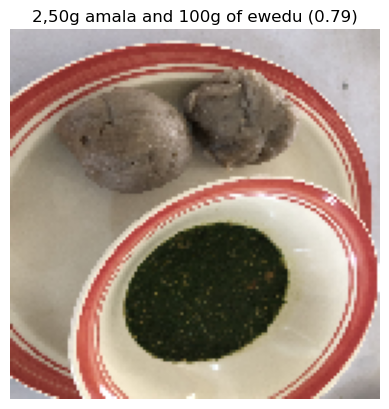

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ✅ Load the model
model_path = "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/cnn_combined_116class.h5"
model = load_model(model_path)
print("✅ Model loaded successfully.")

# ✅ Load class names
label_names = np.load("C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/label_map_116.npy", allow_pickle=True)

# ✅ Function to load and preprocess a single image
def preprocess_image(img_path, img_size=(128, 128)):
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"❌ Image not found: {img_path}")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0
    return img

# ✅ Predict function
def predict_images(image_paths, img_size=(128, 128)):
    images = [preprocess_image(p, img_size) for p in image_paths]
    images = np.array(images)
    predictions = model.predict(images)
    return predictions

# ✅ Visualize predictions with top-1 label
def display_predictions(image_paths, predictions):
    for i, img_path in enumerate(image_paths):
        img = preprocess_image(img_path)
        pred_probs = predictions[i]
        top_index = np.argmax(pred_probs)
        label = label_names[top_index]
        confidence = pred_probs[top_index]

        plt.imshow(img)
        plt.title(f"{label} ({confidence:.2f})")
        plt.axis('off')
        plt.show()

# ✅ Example usage
sample_images = [
    "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese/Amala/IMG_0625.jpeg",
    "C:/Users/Grace Ataguba/anaconda3/myprogs/Deepobese/DeepObese/Amala/IMG_0626.jpeg",
]

# ✅ Run predictions
predictions = predict_images(sample_images)

# ✅ Display results
display_predictions(sample_images, predictions)



In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 28s 489ms/step - loss: 0.1604 - accuracy: 0.9541 - val_loss: 0.3270 - val_accuracy: 0.9188
Epoch 2/20
54/54 [==============================] - 25s 458ms/step - loss: 0.1833 - accuracy: 0.9425 - val_loss: 0.3174 - val_accuracy: 0.9304
Epoch 3/20
54/54 [==============================] - 24s 451ms/step - loss: 0.1450 - accuracy: 0.9535 - val_loss: 0.4010 - val_accuracy: 0.9142
Epoch 4/20
54/54 [==============================] - 23s 428ms/step - loss: 0.1637 - accuracy: 0.9547 - val_loss: 0.3573 - val_accuracy: 0.9142
Epoch 5/20
54/54 [==============================] - 23s 420ms/step - loss: 0.1964 - accuracy: 0.9326 - val_loss: 0.3658 - val_accuracy: 0.9142
Epoch 6/20
54/54 [==============================] - 23s 430ms/step - loss: 0.1469 - accuracy: 0.9547 - val_loss: 0.3495 - val_accuracy: 0.9142
Epoch 7/20
54/54 [==============================] - 23s 415ms/step - loss: 0.1403 - accuracy: 0.9611 - val_loss: 0.3531 - val_accuracy: 0.9281

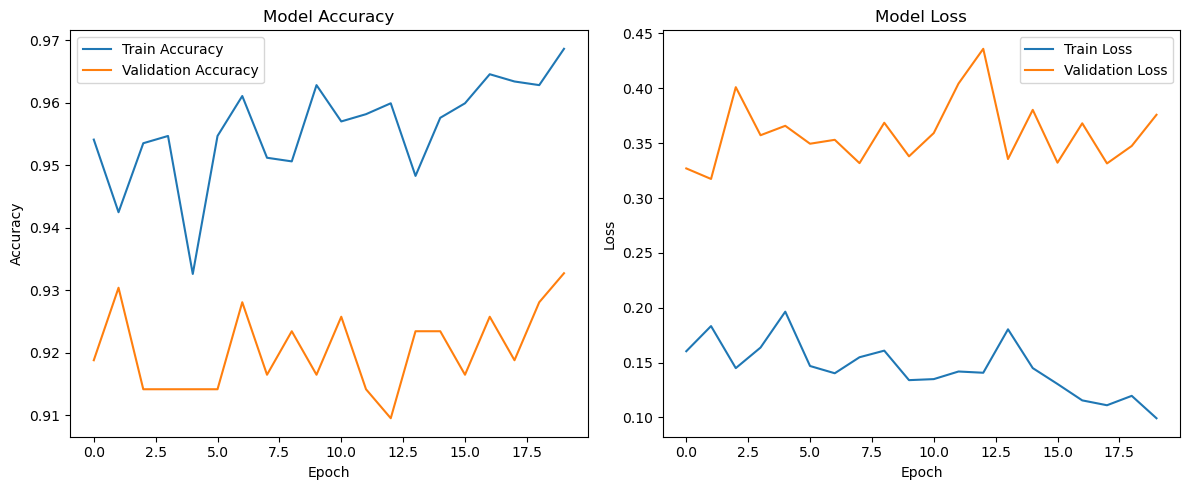

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# ✅ Predict on test set for AUROC
y_pred_probs = model.predict(X_test)

# ✅ AUROC Score (macro-averaged for multi-class)
auroc_score = roc_auc_score(y_test, y_pred_probs, multi_class='ovr', average='macro')
print(f"\n✅ AUROC (OvR, Macro Avg): {auroc_score:.4f}")

17/17 [==============================] - 1s 81ms/step

✅ AUROC (OvR, Macro Avg): 0.9976


17/17 [==============================] - 2s 86ms/step

✅ AUROC (OvR, Macro Avg): 0.9976


C:\Users\Grace Ataguba\AppData\Local\Temp\ipykernel_18184\2390432658.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 116)


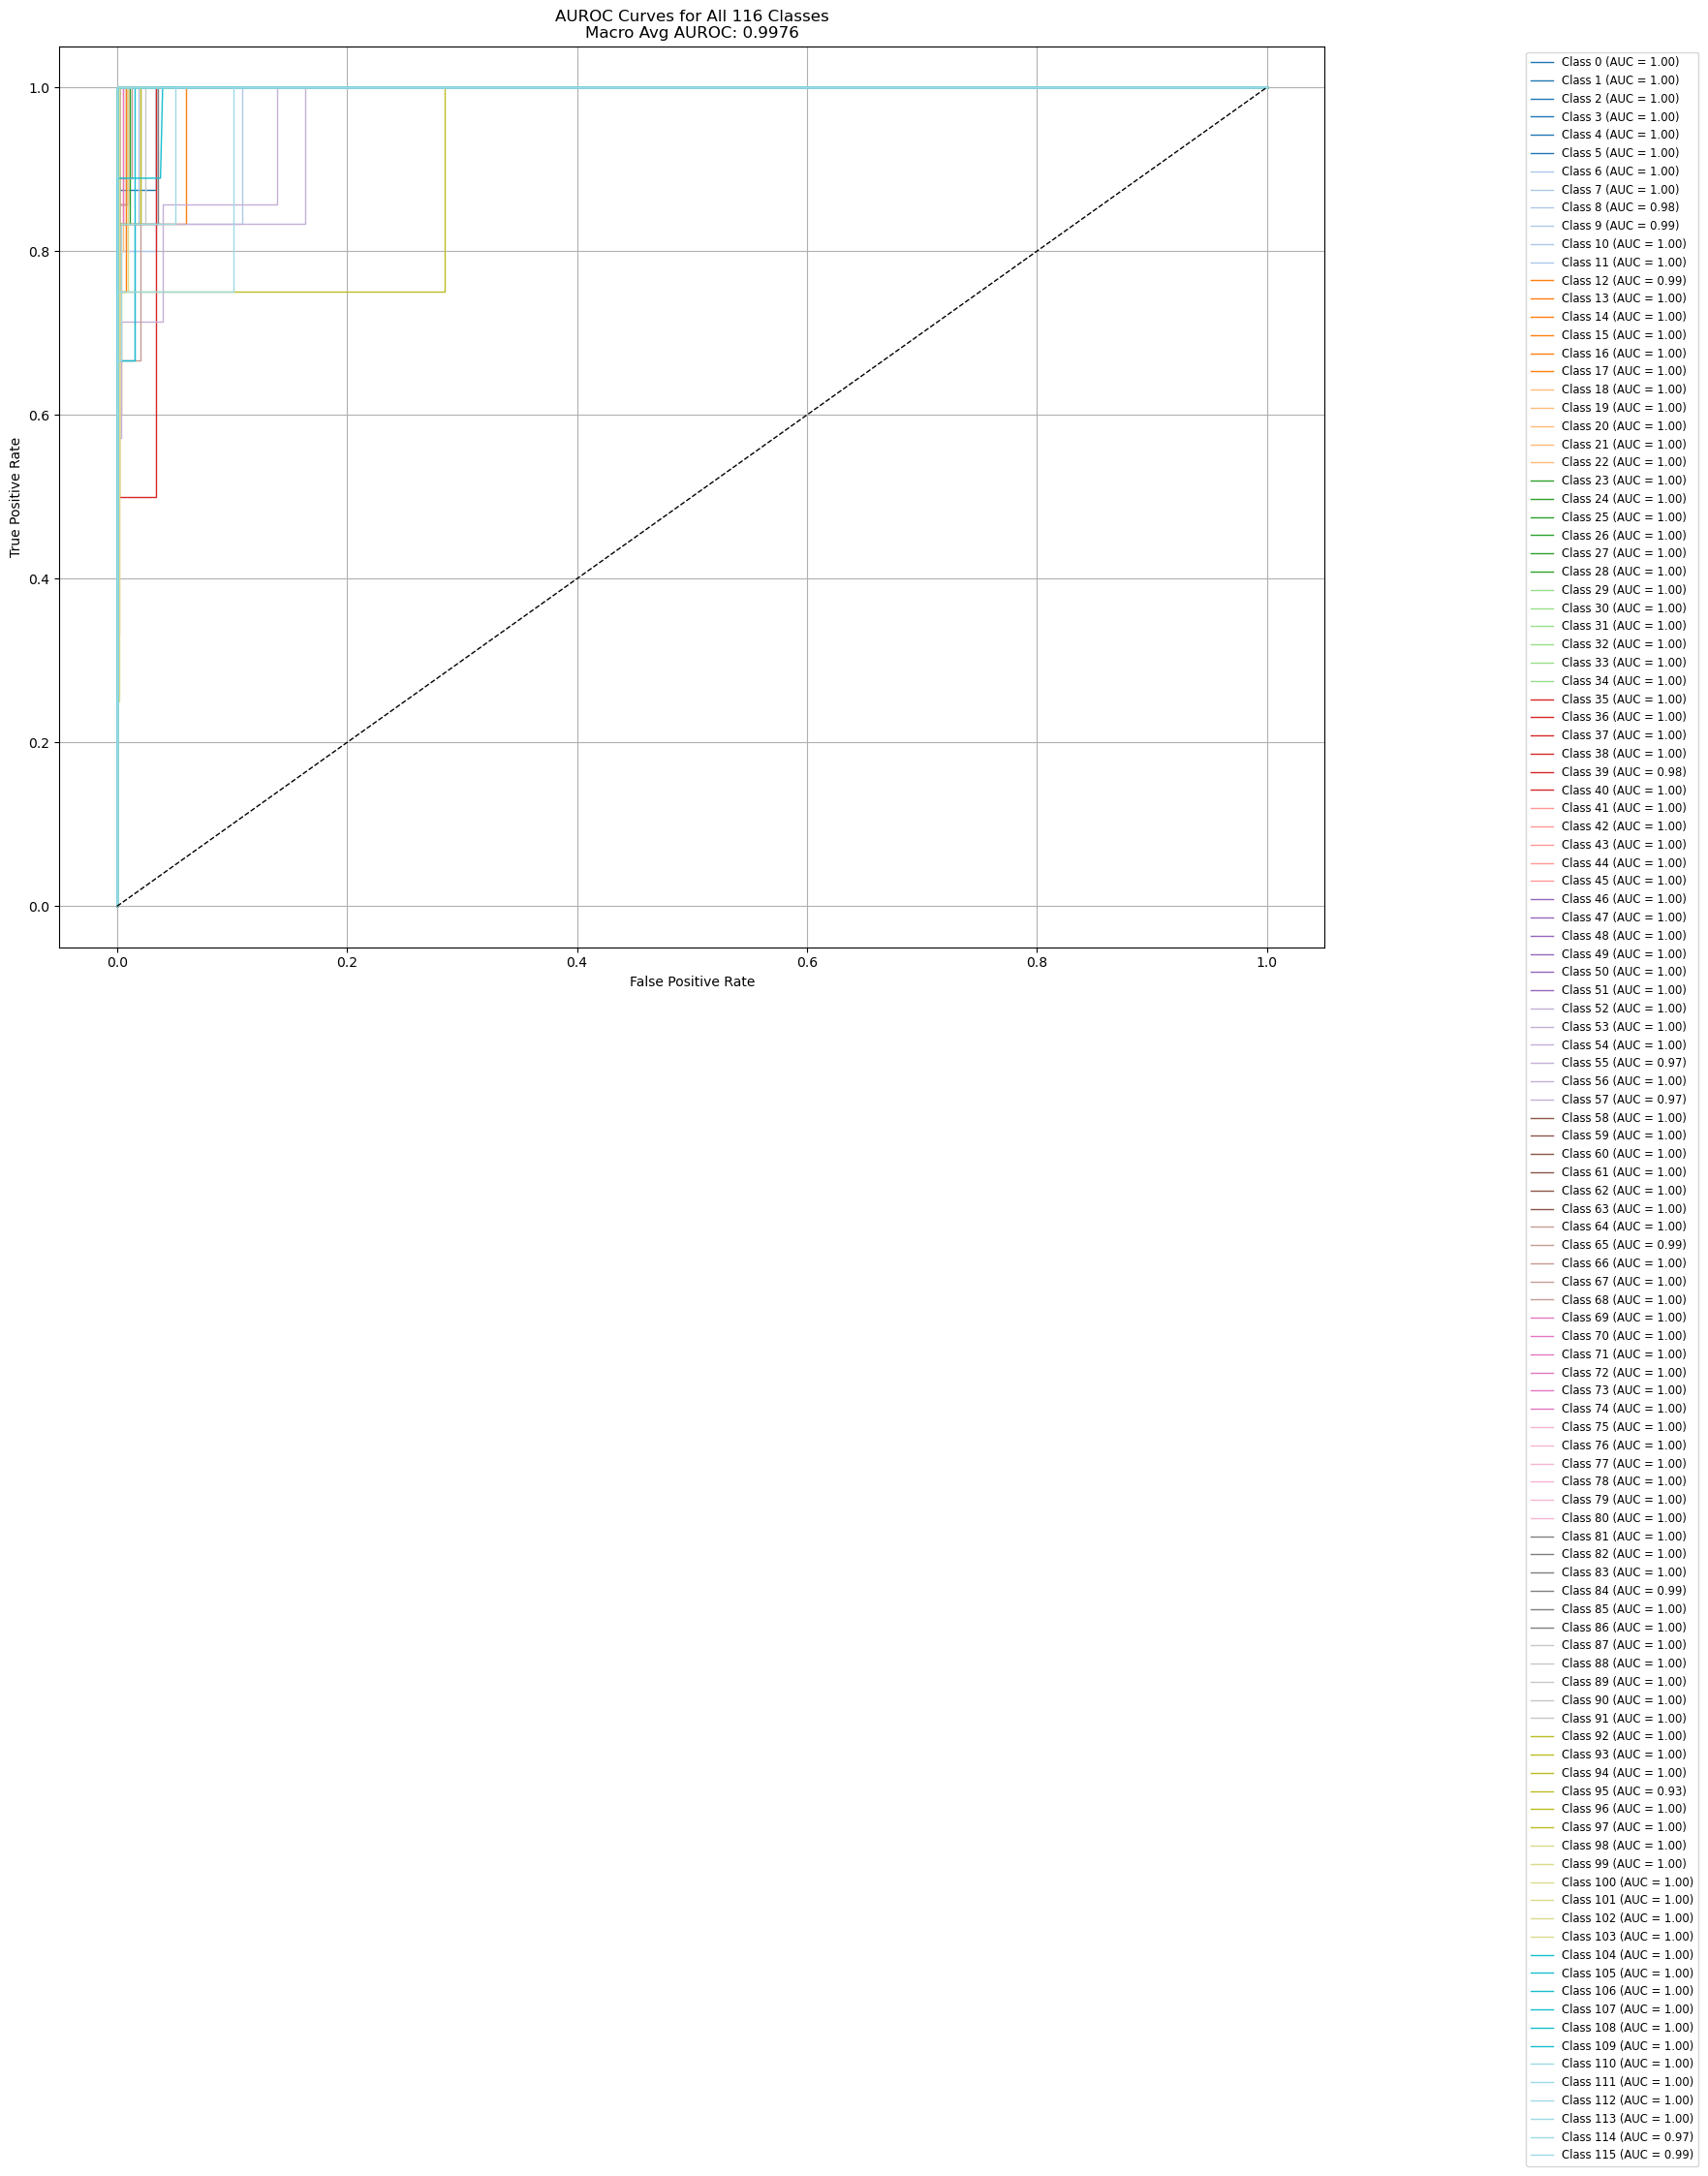

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# ✅ Plot ROC curves for a few sample classes
# ✅ Predict on test set for AUROC
# ✅ Predict on test set for AUROC
y_pred_probs = model.predict(X_test)

# ✅ AUROC Score (macro-averaged for multi-class)
auroc_score = roc_auc_score(y_test, y_pred_probs, multi_class='ovr', average='macro')
print(f"\n✅ AUROC (OvR, Macro Avg): {auroc_score:.4f}")

# ✅ Display AUROC Score on Plot
plt.figure(figsize=(18, 18))
colors = plt.cm.get_cmap('tab20', 116)
for i in range(116):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label=f"Class {i} (AUC = {roc_auc:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUROC Curves for All 116 Classes\nMacro Avg AUROC: {auroc_score:.4f}')
plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()